<a href="https://colab.research.google.com/github/SamuelBFavarin/democratOrRepublicanClassifier/blob/master/DemocratOrRepublican.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando dados CSV

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
path = "/content/gdrive/Shared drives/Tecnologia/Conecta Talks/Talk 0 - Inteligência Artificial/ClassificationDataSet/votes.csv"
df = pd.read_csv(path)

Contexto do dataset


---


*   Dados de eleitores democratas (esqueda) e repúblicanos (direita)
*   Respostas 0 = Não / 1 = Sim / 2 = Não Sei




Análise exploratória dos dados

In [0]:
df.head(20)

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,2,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,2
2,democrat,2,1,1,2,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,2,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,2,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,2,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,2,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
9,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,2,2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   class                                   435 non-null    object
 1   handicapped-infants                     435 non-null    int64 
 2   water-project-cost-sharing              435 non-null    int64 
 3   adoption-of-the-budget-resolution       435 non-null    int64 
 4   physician-fee-freeze                    435 non-null    int64 
 5   el-salvador-aid                         435 non-null    int64 
 6   religious-groups-in-schools             435 non-null    int64 
 7   anti-satellite-test-ban                 435 non-null    int64 
 8   aid-to-nicaraguan-contras               435 non-null    int64 
 9   mx-missile                              435 non-null    int64 
 10  immigration                             435 non-null    int64 
 11  synfue

In [0]:
df.columns

Index(['class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [0]:
republicans = df[df['class'] == 'republican']
democrats = df[df['class'] == 'democrat']


handicapped-infants
0 -> Not | 1 -> Yes | 2 -> Idk


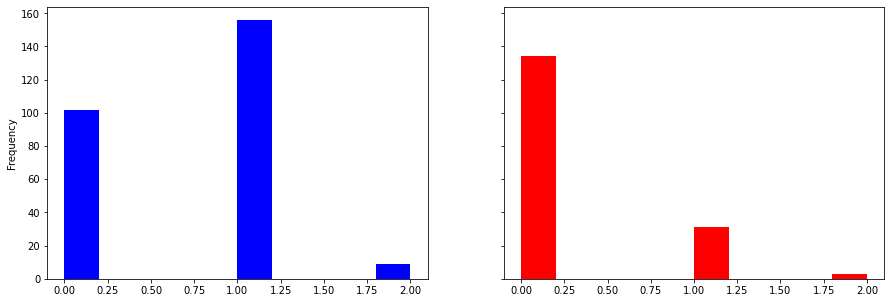

water-project-cost-sharing
0 -> Not | 1 -> Yes | 2 -> Idk


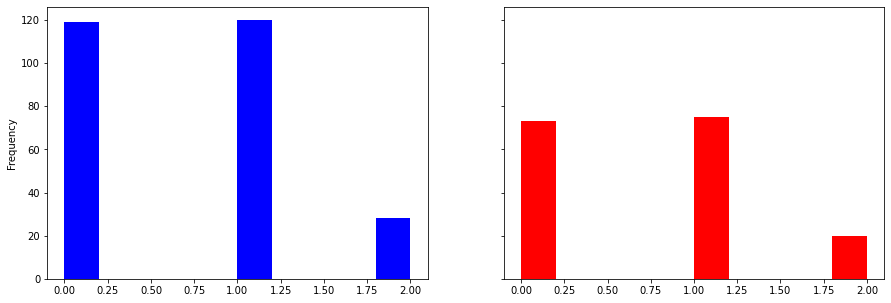

adoption-of-the-budget-resolution
0 -> Not | 1 -> Yes | 2 -> Idk


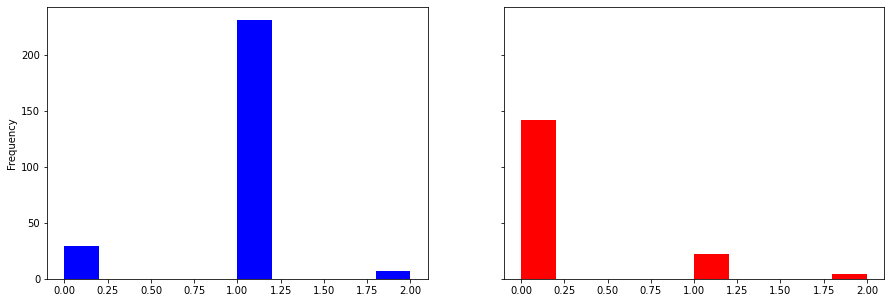

physician-fee-freeze
0 -> Not | 1 -> Yes | 2 -> Idk


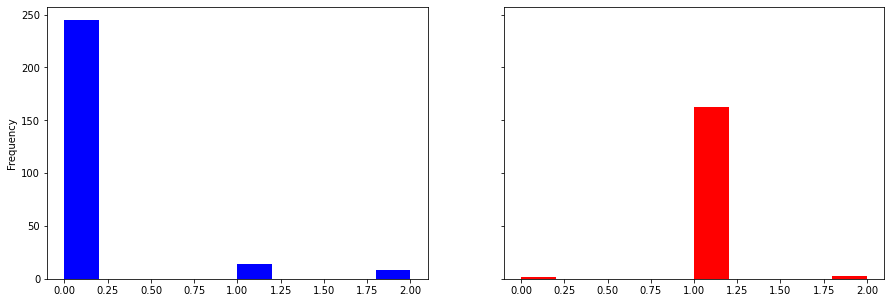

el-salvador-aid
0 -> Not | 1 -> Yes | 2 -> Idk


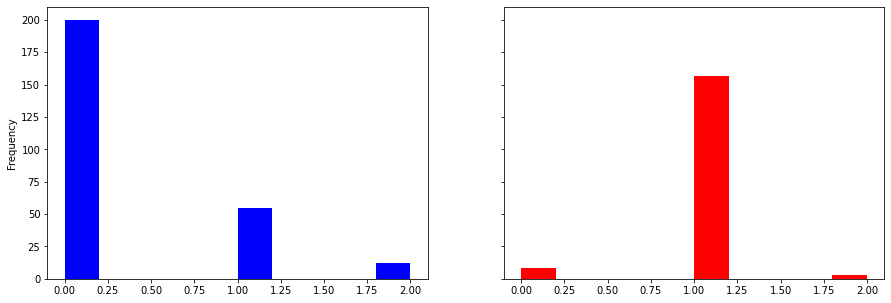

religious-groups-in-schools
0 -> Not | 1 -> Yes | 2 -> Idk


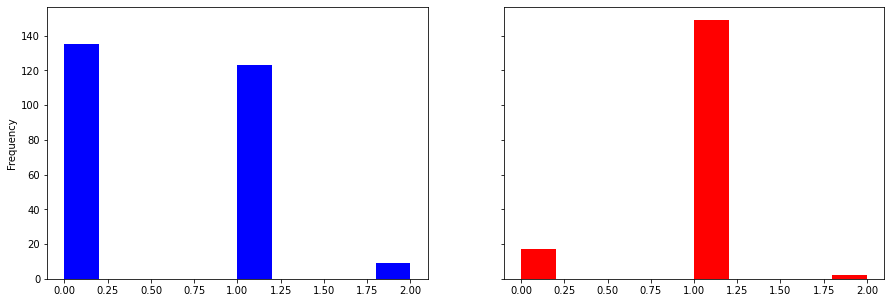

anti-satellite-test-ban
0 -> Not | 1 -> Yes | 2 -> Idk


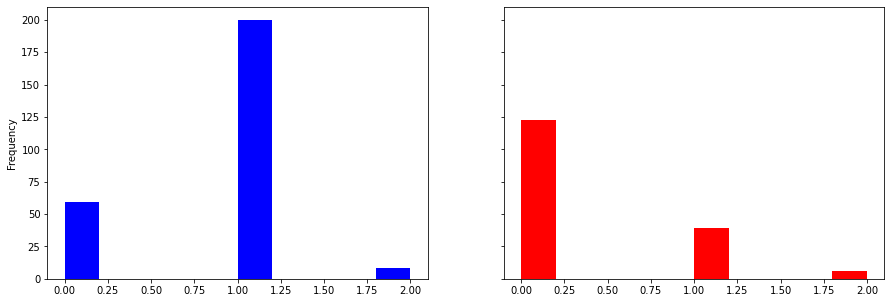

aid-to-nicaraguan-contras
0 -> Not | 1 -> Yes | 2 -> Idk


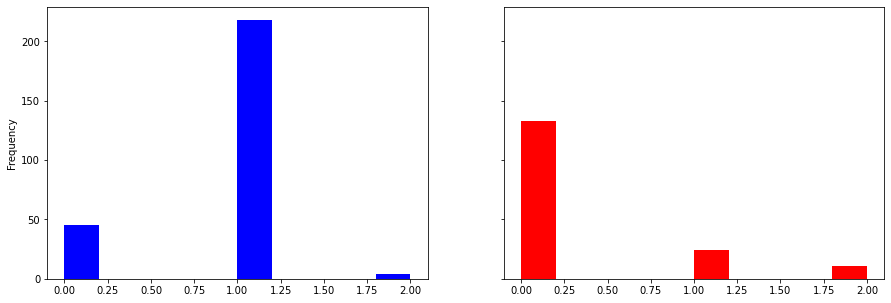

mx-missile
0 -> Not | 1 -> Yes | 2 -> Idk


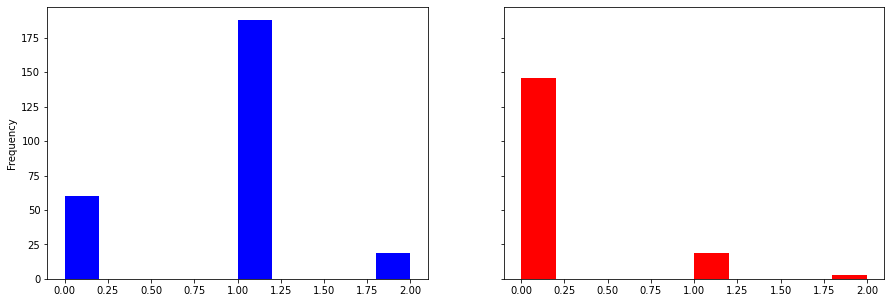

immigration
0 -> Not | 1 -> Yes | 2 -> Idk


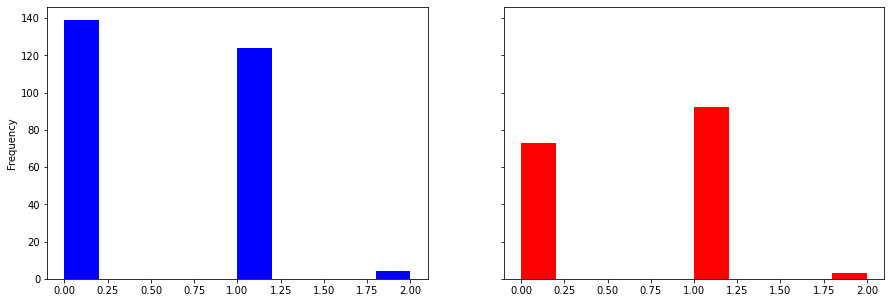

synfuels-corporation-cutback
0 -> Not | 1 -> Yes | 2 -> Idk


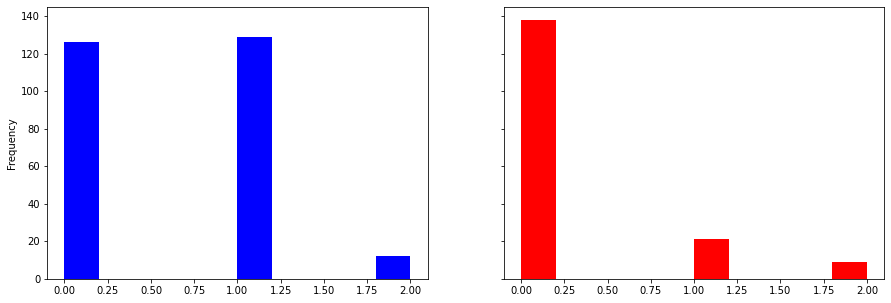

education-spending
0 -> Not | 1 -> Yes | 2 -> Idk


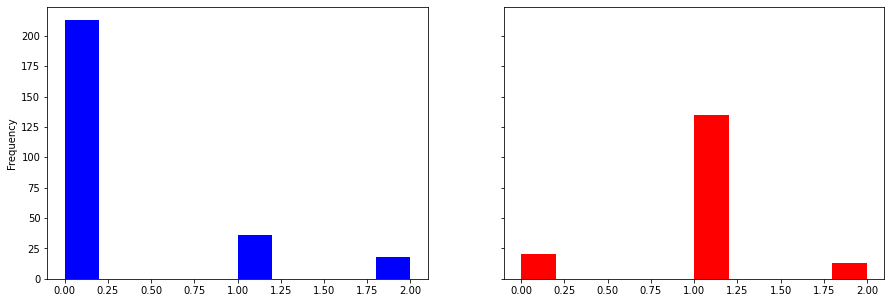

superfund-right-to-sue
0 -> Not | 1 -> Yes | 2 -> Idk


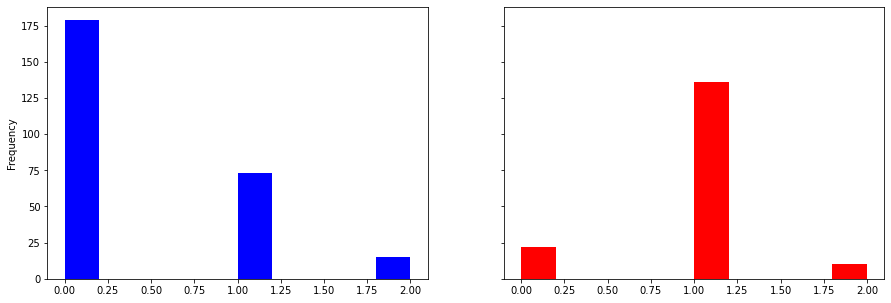

crime
0 -> Not | 1 -> Yes | 2 -> Idk


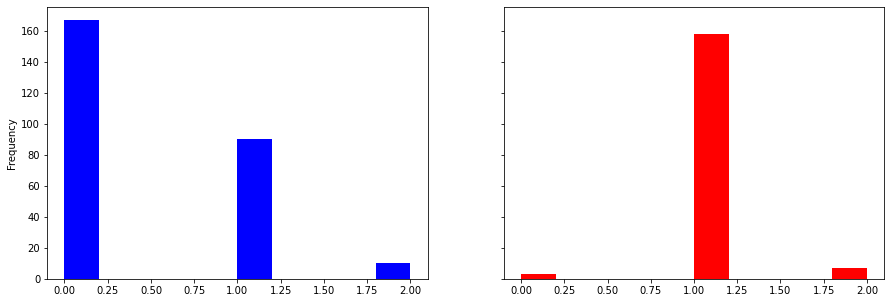

duty-free-exports
0 -> Not | 1 -> Yes | 2 -> Idk


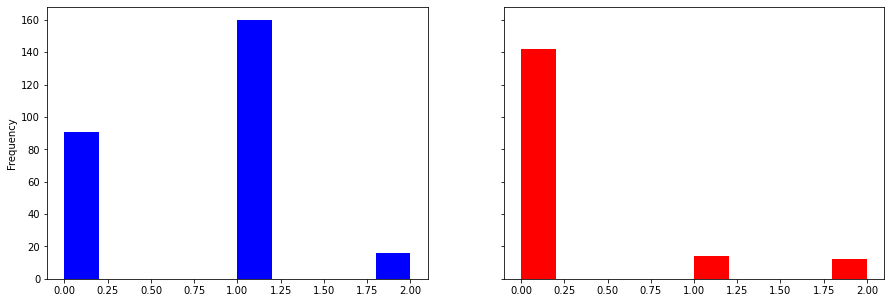

export-administration-act-south-africa
0 -> Not | 1 -> Yes | 2 -> Idk


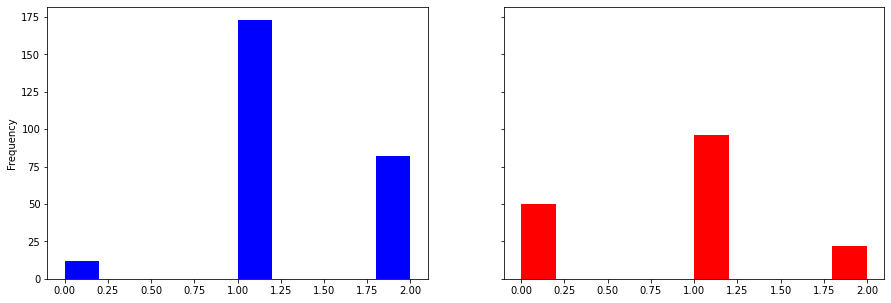

In [0]:
import matplotlib.pyplot as plt

for feature in df.columns[1:]:
  print(feature)

  print('0 -> Not | 1 -> Yes | 2 -> Idk')

  fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))

  democrats[feature].plot(kind="hist", color="blue", x="democratas", ax=ax, legend=False)
  republicans[feature].plot(kind="hist", color="red", x="Republicanos", ax=ax2, legend=False)
  

  plt.show()



Definindo parâmetros para o modelo de Rede Neural Multi Layer Perceptron

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
X = df.iloc[:,1:17]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

Treinamento do modelo

In [0]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Resultados do treinamento

In [0]:
predict_train = clf.predict(X_train)

In [0]:
print('Matriz de confusão: \n')
print(confusion_matrix(y_train,predict_train))

Matriz de confusão: 

[[197   3]
 [  3 123]]


In [0]:
print('Parâmetros de avaliação: \n')
print(classification_report(y_train,predict_train))

Parâmetros de avaliação: 

              precision    recall  f1-score   support

    democrat       0.98      0.98      0.98       200
  republican       0.98      0.98      0.98       126

    accuracy                           0.98       326
   macro avg       0.98      0.98      0.98       326
weighted avg       0.98      0.98      0.98       326



In [0]:
print('Acurácia:')
clf.score(X_train, y_train)

Acurácia:


0.9815950920245399

Resultados do teste

In [0]:
predict_test = clf.predict(X_test)

In [0]:
print('Matriz de confusão: \n')
print(confusion_matrix(y_test,predict_test))

Matriz de confusão: 

[[63  4]
 [ 3 39]]


In [0]:
print('Parâmetros de avaliação: \n')
print(classification_report(y_test,predict_test))

Parâmetros de avaliação: 

              precision    recall  f1-score   support

    democrat       0.95      0.94      0.95        67
  republican       0.91      0.93      0.92        42

    accuracy                           0.94       109
   macro avg       0.93      0.93      0.93       109
weighted avg       0.94      0.94      0.94       109



In [0]:
print('Acurácia:')
clf.score(X_test, y_test)

Acurácia:


0.9357798165137615

Teste com valores inéditos

In [0]:
d = {
      'handicapped-infants':                    [0], 
      'water-project-cost-sharing':             [0],
      'adoption-of-the-budget-resolution':      [0],
      'physician-fee-freeze':                   [1],
      'el-salvador-aid':                        [1],
      'religious-groups-in-schools':            [1],
      'anti-satellite-test-ban':                [0],
      'aid-to-nicaraguan-contras':              [1],
      'mx-missile':                             [0],
      'immigration':                            [1],
      'synfuels-corporation-cutback':           [1],
      'education-spending':                     [0],
      'superfund-right-to-sue':                 [1],
      'crime':                                  [0],
      'duty-free-exports':                      [1],
      'export-administration-act-south-africa': [1]
     }
  
X_NEW_VALUE = pd.DataFrame(data=d)
print(clf.predict(X_NEW_VALUE)[0])

republican


In [0]:
!pip install skater

2020-05-20 14:27:45,126 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[16/16] features ████████████████████ Time elapsed: 1 seconds

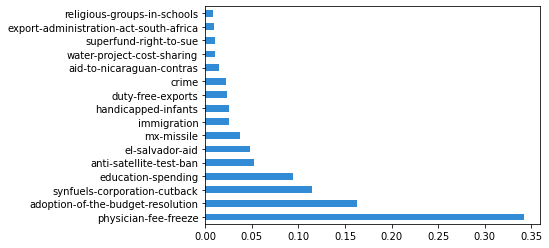

In [0]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(X_test, feature_names=df.columns[1:])
model = InMemoryModel(clf.predict_proba, examples=X_test)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending = False)
plt.show()